### BrainStation Gestational Diabetes Capstome Project_February 2023

##### Author: Omoboade Afolabi

# Table of Contents

* [1. Introduction](#intro-bullet)
    * [1.1. Problem Statement and impact](#intro-bullet1)
    * [1.2. Data Dictionary](#intro-bullet2)
    * [1.2. Loading Libraries](#intro-bullet2)

    <br>

* [2. Loading and Cleaning the data set](#Loadclean-bullet)
    * [2.1. Loading the dataset](#Loadclean-bullet1)
    * [2.2. Making Case Number the index and reloading the data set](#Loadclean-bullet2)
    * [2.3. Dealing with missing values and duplicate rows or columns](#NaN-bullet3)
        * [2.3.1. Missing BMI and OGTT values](#NaN-bullet31)
        * [2.3.2. Missing Systolic BP values](#NaN-bullet32)
        * [2.3.2. Missing HDL values](#NaN-bullet33)

        <br>
        
* [3. Exploratory Data analysis](#EDA-bullet)
    * [3.1. Feature distribution](#EDA-bullet1)
    * [3.2. Relationship between predictor variables and the target variable](#EDA-bullet2)
    * [3.3. Correlation between the target variable and all predictor variables](#EDA-bullet3)
    * [3.4. Distribution of predictor variables with r> 0.4 with the target variable](#EDA-bullet4)
    * [3.5. Correlation between all variables to check for multicollinearity](#EDA-bullet5)

    <br>

* [4. Baseline Logistic Regression model](#Baselinemodel-bullet)
    * [4.1. Model evaluation](#Baselinemodel-bullet1)
        
    <br>
        
* [5. Feature Engineering](#FeatureEngineering-bullet)
    * [5.1. Dummify the new columns and rename](#FeatureEngineering-bullet1)
    * [5.2. Examine the realtionship between the new columns and the target variable]((#FeatureEngineering-bullet2)
            
    <br>
        
* [6. Models after feature engineering](#Models-bullet)
    * [6.1. Logistic Regression Classifier](#Models-bullet1)
        *[6.1.1. Model Evaluation](#Models-bullet11)
        *[6.1.2. Model Hyperparameter Optimization](#Models-bullet12)
    * [6.2. K Nearest Neighbor Classifier](#Models-bullet2)
        *[6.2.1. Model Evaluation](#Models-bullet21)
        *[6.2.2. Model Hyperparameter Optimization](#Models-bullet22)
    * [6.3. Random Forest Classifier](#Models-bullet3)
        *[6.3.1. Model Evaluation](#Models-bullet11)
                
         <br>
                
* [7. Final model selection](#FinalModels-bullet)
    * [7.1. GridSearch CV](#FinalModels-bullet-bullet1)
    * [7.2. Best Model: Logistic Regression](#FinalModels-bullet-bullet2)
        * [7.2.1. Best Model: Evaluation](#FinalModels-bullet-bullet21)
    * [7.3. Acute and Chronic Features](#FinalModels-bullet-bullet3)
        * [7.3.1. Top 10 Features](#FinalModels-bullet-bullet31)
        * [7.3.2. Bottom 10 Features](#FinalModels-bullet-bullet32)
            
        <br>
                
* [8. Summary and conclusion](#Summary-bullet) 

## 1. Introduction<a class="anchor" id="intro-bullet"></a>

Gestational Diabetes Mellitus (GDM) is a type of pregnancy that occurs in the second to third trimester of pregnancy when the body is unable to produce enough insulin to handle the effects of a growing baby and changing hormone levels. This leads to a rise in the blood sugar levels.

Some risk factors for GDM include:
- Age (Being 25 years and above)
- Overweight or Obese
- Sesentary lifestyle
- Prediabetes
- Previous gestational diabetes
- Polycystic Ovary Syndrome(PCOS)
- Family History of diabetes
- Previous large child at birth, more than 9 pounds (4 kilograms)
- Being of a certain race or ethnicity, such as Black, Hispanic, American Indian and Asian American

#### 1.1. Problem Statement and impact<a class="anchor" id="intro-bullet2"></a>

In Canada, between 3 – 20% of pregnant women develop gestational diabetes, depending on their risk factors. Undiagnosed and untreated GDM could lead to adverse pregnancy outcomes both for the baby and mother increasing health cost. 

This project aims to predict GDM based on medical, physical, social and other risk factors using supervised machine learning methods. Early diagnosis and treatment would reduce Neonatal Intensive Care Unit (NICU) admissions resulting from macrosomia(baby born too large) and hypoglycemia(baby having a low blood sugar), further reducing the hospital cost for babies, mothers and physician costs.
Providing Optimal care for pregnant women diagnosed with GDM reduces adverse pregnancy outcomes and complications during delivery. Self-management education and support is crucial in keeping blood sugars normal.

The Canadian Diabetes Association and the American Diabetes Association recommend that all pregnant women be screened for gestational diabetes between 24 and 28 weeks gestation, and earlier if high risk factors are present using the oral glucose tolerance test (OGTT).


#### 1.2.  Data Dictionary<a class="anchor" id="intro-bullet1"></a>

The data was downloded from Kaggle but it is originally from a research paper by A. Sumathi and S. Meganathan on predicting GDM using an Ensemble Classifier.
https://www.kaggle.com/datasets/sumathisanthosh/gestational-diabetes-mellitus-gdm-data-set

A. Sumathi and S. Meganathan, "Ensemble classifier technique to predict gestational diabetes mellitus (gdm)," Computer Systems Science and Engineering, vol. 40, no.1, pp. 313–325, 2022.
https://www.techscience.com/csse/v40n1/44217

The data contains 3525 rows of pregnant women and 17 columns.

| Column                       | Description                                                                                    |
| -----------------------------| -----------------------------------------------------------------------------------------------|
| Case Number                  | Unique Identifier                                                                              |
| Age                          | Age of the pregnant woman in years                                                             |
| BMI                          | Body Mass Index ((weight in kg/height in m)^2)                                                 |
| HDL                          | High Density Lipoprotein/Good protein(mg/dL)                                                   |
| Large Child or Birth Default | Large Child or Birth Default - Baby weighed more than 4 kg (9lbs) at birth (Yes=1 or No=0)     |                                                                    
| PCOS                         | Has Polycystic Ovary Syndrome(Yes=1 or No=0)                                                   |
| OGTT                         | Oral Glucose Tolerance Test(mg/dL)                                                             |
| Systolic BP                  | Systolic Blood pressure(mm Hg)                                                                 |
| Diastolic BP                 | Diastolic Blood pressure(mm Hg)                                                                |
| Prediabetes                  | Prediabetes(Yes=1 or No=0)                                                                     |
| Unexplained prenatal loss    | loss of a fetus or an infant for which no explanation or cause can be identified(Yes=1 or No=0)|
| Family History of Diabetes   | Has a family history of diabetes(Yes=1 or No=0)                                                |
| No of Pregnancy              | Number of pregnancy                                                                            |
| Previous Pregnancy Gestation | Has had a previous pregnancy(Yes=1 or No=0)                                                    |
| Sedentary lifestyle          | Presence or absence of exercise(Yes=1 or No=0)                                                 |
| GDM                          | Diagnosed with Gestational Diabetes(Yes=1 or No=0)                                             |

#### 1.2.  Loading Libraries<a class="anchor" id="intro-bullet1"></a>

In [1]:
# base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Hide warnings that appear with logistic regression without updating Scikit-learn
import warnings
warnings.filterwarnings('ignore')

# For models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

# For feature preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA

# For model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# for model optimization
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp

## 2. Loading and Cleaning the data set<a class="anchor" id="#Loadclean-bullet"></a>

#### 2.1. Loading the data set<a class="anchor" id="#Loadclean-bullet1"></a>

In [2]:
# Loading the data set
gdm_df = pd.read_excel('Gestational Diabetic Dat Set.xlsx')

In [3]:
# viewing the dataframe head
gdm_df.head()

Case Number  Age  No of Pregnancy  Gestation in previous Pregnancy  BMI  \
0            1   22                2                                1  NaN   
1            2   26                2                                1  NaN   
2            3   29                1                                0  NaN   
3            4   28                2                                1  NaN   
4            5   21                2                                1  NaN   

    HDL  Family History  unexplained prenetal loss  \
0  55.0               0                          0   
1  53.0               0                          0   
2  50.0               0                          0   
3  51.0               0                          0   
4  52.0               0                          0   

   Large Child or Birth Default  PCOS  Sys BP  Dia BP  OGTT  Hemoglobin  \
0                             0     0   102.0      69   NaN        12.0   
1                             0     0   101.0      63   NaN        12.4   
2                             0     0   118.0      79   NaN        14.3   
3                             0     0    99.0      70   NaN        15.0   
4                             0     0   116.0      65   NaN        15.0   

   Sedentary Lifestyle  Prediabetes  Class Label(GDM /Non GDM)  
0                    0            0                          0  
1                    0            0                          0  
2                    0            0                          0  
3                    0            0                          0  
4                    0            0                          0

#### 2.2. Making Case Number the index and reloading the data set<a class="anchor" id="#Loadclean-bullet2"></a>

In [4]:
# checking if case number is unique so we can make it the index
gdm_df['Case Number'].unique().shape[0] == gdm_df.shape[0]

True

In [5]:
# re-importing the data to make Case Number the index
gdm_df = pd.read_excel('Gestational Diabetic Dat Set.xlsx',index_col = 'Case Number')

# viewing thedataframe
gdm_df.head()

Age  No of Pregnancy  Gestation in previous Pregnancy  BMI   HDL  \
Case Number                                                                     
1             22                2                                1  NaN  55.0   
2             26                2                                1  NaN  53.0   
3             29                1                                0  NaN  50.0   
4             28                2                                1  NaN  51.0   
5             21                2                                1  NaN  52.0   

             Family History  unexplained prenetal loss  \
Case Number                                              
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   
5                         0                          0   

             Large Child or Birth Default  PCOS  Sys BP  Dia BP  OGTT  \
Case Number                                                             
1                                       0     0   102.0      69   NaN   
2                                       0     0   101.0      63   NaN   
3                                       0     0   118.0      79   NaN   
4                                       0     0    99.0      70   NaN   
5                                       0     0   116.0      65   NaN   

             Hemoglobin  Sedentary Lifestyle  Prediabetes  \
Case Number                                                 
1                  12.0                    0            0   
2                  12.4                    0            0   
3                  14.3                    0            0   
4                  15.0                    0            0   
5                  15.0                    0            0   

             Class Label(GDM /Non GDM)  
Case Number                             
1                                    0  
2                                    0  
3                                    0  
4                                    0  
5                                    0

In [6]:
# checking the data types
gdm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3525 entries, 1 to 3525
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              3525 non-null   int64  
 1   No of Pregnancy                  3525 non-null   int64  
 2   Gestation in previous Pregnancy  3525 non-null   int64  
 3   BMI                              2444 non-null   float64
 4   HDL                              2524 non-null   float64
 5   Family History                   3525 non-null   int64  
 6   unexplained prenetal loss        3525 non-null   int64  
 7   Large Child or Birth Default     3525 non-null   int64  
 8   PCOS                             3525 non-null   int64  
 9   Sys BP                           1820 non-null   float64
 10  Dia BP                           3525 non-null   int64  
 11  OGTT                             3012 non-null   float64
 12  Hemoglobin          

In [7]:
# viewing sumarry statistics

gdm_df.describe().T

count        mean        std   min    25%  \
Age                              3525.0   32.581277   6.169107  20.0   28.0   
No of Pregnancy                  3525.0    2.076312   0.838637   1.0    1.0   
Gestation in previous Pregnancy  3525.0    0.960851   0.722313   0.0    0.0   
BMI                              2444.0   27.854092   5.714737  13.3   24.4   
HDL                              2524.0   46.471870  10.800813  15.0   42.0   
Family History                   3525.0    0.498156   0.500068   0.0    0.0   
unexplained prenetal loss        3525.0    0.364823   0.481449   0.0    0.0   
Large Child or Birth Default     3525.0    0.357730   0.479400   0.0    0.0   
PCOS                             3525.0    0.264681   0.441226   0.0    0.0   
Sys BP                           1820.0  135.762088  22.742844  90.0  122.0   
Dia BP                           3525.0   81.538156  11.379758  60.0   74.0   
OGTT                             3012.0  170.707503  48.160549  80.0  142.0   
Hemoglobin                       3525.0   13.959801   1.863969   8.8   12.7   
Sedentary Lifestyle              3525.0    0.449645   0.497529   0.0    0.0   
Prediabetes                      3525.0    0.293050   0.455226   0.0    0.0   
Class Label(GDM /Non GDM)        3525.0    0.389220   0.487643   0.0    0.0   

                                   50%    75%    max  
Age                               32.0   37.0   45.0  
No of Pregnancy                    2.0    3.0    4.0  
Gestation in previous Pregnancy    1.0    1.0    2.0  
BMI                               27.5   31.0   45.0  
HDL                               49.0   55.0   70.0  
Family History                     0.0    1.0    1.0  
unexplained prenetal loss          0.0    1.0    1.0  
Large Child or Birth Default       0.0    1.0    1.0  
PCOS                               0.0    1.0    1.0  
Sys BP                           132.0  153.0  185.0  
Dia BP                            81.0   86.0  124.0  
OGTT                             156.0  195.0  403.0  
Hemoglobin                        14.0   15.0   18.0  
Sedentary Lifestyle                0.0    1.0    1.0  
Prediabetes                        0.0    1.0    1.0  
Class Label(GDM /Non GDM)          0.0    1.0    1.0

In [8]:
# checking the shape of the data
gdm_df.shape
print(f'There are {gdm_df.shape[0]} rows and {gdm_df.shape[1]} columns in the dataset.')

There are 3525 rows and 16 columns in the dataset.


#### 2.3. Dealing with missing values and duplicate rows or columns<a class="anchor" id="#NaN-bullet3"></a>

In [9]:
# Checking for nulls
gdm_df.isnull().sum().sum()

4300

BMI, HDL, Sys BP and OGTT all have misisng values

In [10]:
#checking the proportion of missing values
(gdm_df.isnull().mean()*100).round(2)

Age                                 0.00
No of Pregnancy                     0.00
Gestation in previous Pregnancy     0.00
BMI                                30.67
HDL                                28.40
Family History                      0.00
unexplained prenetal loss           0.00
Large Child or Birth Default        0.00
PCOS                                0.00
Sys BP                             48.37
Dia BP                              0.00
OGTT                               14.55
Hemoglobin                          0.00
Sedentary Lifestyle                 0.00
Prediabetes                         0.00
Class Label(GDM /Non GDM)           0.00
dtype: float64

<Figure size 1000x600 with 0 Axes>

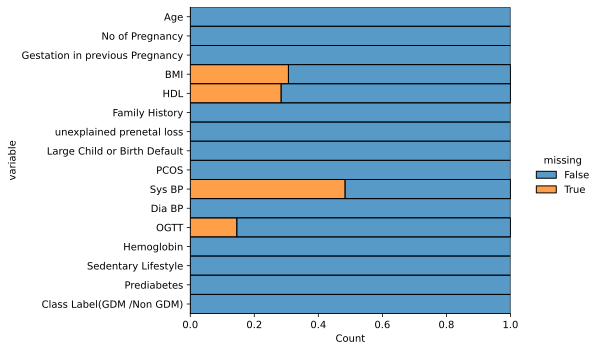

In [11]:
#visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=gdm_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)
plt.savefig("visualizing_missing_data in gdm_df.png", dpi=100)


In [12]:
# renaming columns for uniformity 
gdm_df = gdm_df.rename(columns={"Gestation in previous Pregnancy": "Previous Pregnancy Gestation", "Family History": "Family History of Diabetes", 
                       "unexplained prenetal loss": "Unexplained Prenetal Loss",
                       "Sys BP": "Systolic BP", "Dia BP": "Diastolic BP", "Class Label(GDM /Non GDM)": "GDM"})

#checking that the columns have been renamed
gdm_df

Age  No of Pregnancy  Previous Pregnancy Gestation   BMI   HDL  \
Case Number                                                                   
1             22                2                             1   NaN  55.0   
2             26                2                             1   NaN  53.0   
3             29                1                             0   NaN  50.0   
4             28                2                             1   NaN  51.0   
5             21                2                             1   NaN  52.0   
...          ...              ...                           ...   ...   ...   
3521          31                4                             1  24.1  32.0   
3522          26                3                             1  34.5  43.0   
3523          35                2                             2  23.6  56.0   
3524          37                2                             0  23.3  28.0   
3525          43                2                             0  28.6  30.0   

             Family History of Diabetes  Unexplained Prenetal Loss  \
Case Number                                                          
1                                     0                          0   
2                                     0                          0   
3                                     0                          0   
4                                     0                          0   
5                                     0                          0   
...                                 ...                        ...   
3521                                  0                          0   
3522                                  1                          1   
3523                                  1                          0   
3524                                  1                          0   
3525                                  1                          1   

             Large Child or Birth Default  PCOS  Systolic BP  Diastolic BP  \
Case Number                                                                  
1                                       0     0        102.0            69   
2                                       0     0        101.0            63   
3                                       0     0        118.0            79   
4                                       0     0         99.0            70   
5                                       0     0        116.0            65   
...                                   ...   ...          ...           ...   
3521                                    1     0        150.0           107   
3522                                    0     1        166.0            85   
3523                                    1     0        178.0            81   
3524                                    1     1        139.0           115   
3525                                    0     0        121.0            63   

              OGTT  Hemoglobin  Sedentary Lifestyle  Prediabetes  GDM  
Case Number                                                            
1              NaN        12.0                    0            0    0  
2              NaN        12.4                    0            0    0  
3              NaN        14.3                    0            0    0  
4              NaN        15.0                    0            0    0  
5              NaN        15.0                    0            0    0  
...            ...         ...                  ...          ...  ...  
3521         187.0        13.4                    1            1    1  
3522         164.0        14.2                    0            0    1  
3523         141.0        15.3                    0            1    1  
3524         133.0        13.3                    0            1    0  
3525         179.0        15.8                    1            0    0  

[3525 rows x 16 columns]

In [13]:
# Checking for duplicates
# Columns 
print(f'Duplicated columns: {gdm_df.T.duplicated().any()}')

# Rows 
print(f'Duplicated rows: {gdm_df.duplicated().any()}')

Duplicated columns: False
Duplicated rows: True


There are duplicate rows but no duplicate columns.

In [14]:
# Viewing duplicate rows
duplicate_rows = gdm_df[gdm_df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape[0])
print("Duplicate Rows:")
print(duplicate_rows)

Number of duplicate rows:  4
Duplicate Rows:
             Age  No of Pregnancy  Previous Pregnancy Gestation  BMI   HDL  \
Case Number                                                                  
369           30                2                             1  NaN  45.0   
416           30                1                             0  NaN  50.0   
463           30                1                             0  NaN  50.0   
1056          33                3                             1  NaN  44.0   

             Family History of Diabetes  Unexplained Prenetal Loss  \
Case Number                                                          
369                                   1                          0   
416                                   1                          0   
463                                   1                          0   
1056                                  1                          0   

             Large Child or Birth Default  PCOS  Systolic BP  Dia

There are four duplicate rows but a closer look at these rows show that they are actually unique and not duplicate. More then one pregnant
women could share the same characteristics. The case number for each row is different so is the hemoglobin level, HDL and number of pregnancy. I would leave the rows, as I do not consider them as  duplicates.

Is the traget variable imbalanced?

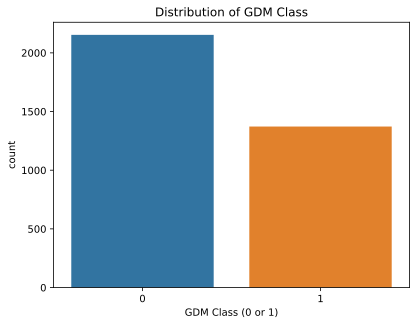

In [15]:
# checking for imbalance in the target variable
gdm_df['GDM'].value_counts(normalize=True)*100

# Plot the count plot
sns.countplot(gdm_df, x="GDM")

# Add a title and label to the x axis
plt.title("Distribution of GDM Class")
plt.xlabel("GDM Class (0 or 1)")

# Show the plot
plt.show()

There is somewhat of an imbalance in the classes 0(No GDM) 61% and 1(GDM) 39%. The dataset is not that small, we still have a good proportion in the 1 class so we would not address the imbalance. Imbalance datasets may however cause models to learn more from the majority class leading to a bias. 

Creating a copy of the data frame(gdm_df) to deal with missing values

In [16]:
gdm = gdm_df.copy()

#### 2.3.1. Missing BMI and OGTT values<a class="anchor" id="#NaN-bullet31"></a>

BMI is skewed and has a positive relationship with age. 

We would calculate the median BMI and OGTT as a function of age and then impute the missing values with the median BMI and OGTT values for each age group. 


In [17]:
# Compute the median of the BMI column
median_bmi_by_age = gdm.groupby('Age')['BMI'].median()

# Fill missing BMI values with the mean
gdm["BMI"] = gdm.groupby('Age')['BMI'].transform(lambda x: x.fillna(x.median()))

In [18]:
# Compute the median of the OGTT column
median_bmi_by_age = gdm.groupby('Age')['OGTT'].median()

# Fill missing OGTT values with the mean
gdm["OGTT"] = gdm.groupby('Age')['OGTT'].transform(lambda x: x.fillna(x.median()))

In [19]:
#Viewing gdm to see if the missing OGTT and BMI values have been inputed
gdm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3525 entries, 1 to 3525
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           3525 non-null   int64  
 1   No of Pregnancy               3525 non-null   int64  
 2   Previous Pregnancy Gestation  3525 non-null   int64  
 3   BMI                           3525 non-null   float64
 4   HDL                           2524 non-null   float64
 5   Family History of Diabetes    3525 non-null   int64  
 6   Unexplained Prenetal Loss     3525 non-null   int64  
 7   Large Child or Birth Default  3525 non-null   int64  
 8   PCOS                          3525 non-null   int64  
 9   Systolic BP                   1820 non-null   float64
 10  Diastolic BP                  3525 non-null   int64  
 11  OGTT                          3525 non-null   float64
 12  Hemoglobin                    3525 non-null   float64
 13  Sed

In [20]:
# checking other columns with missing values
gdm.isnull().sum()

Age                                0
No of Pregnancy                    0
Previous Pregnancy Gestation       0
BMI                                0
HDL                             1001
Family History of Diabetes         0
Unexplained Prenetal Loss          0
Large Child or Birth Default       0
PCOS                               0
Systolic BP                     1705
Diastolic BP                       0
OGTT                               0
Hemoglobin                         0
Sedentary Lifestyle                0
Prediabetes                        0
GDM                                0
dtype: int64

Systolic BP and HDL still has misisng values. We would predict the missing Systolic BP values using diastolic BP.

#### 2.3.2. Missing Systolic BP  values<a class="anchor" id="#NaN-bullet32"></a>

Predicting and filling the missing Systolic BP values with Diastolic BP. A research paper publishe din 2008 by Gavish et al shows that there is a somewhat strong positive relationship between Systolic and Diastolic blood pressures with a correlation coefficient of r = 0.74 ± 0.14. With this knowledge, we would go ahead and input the Systolic BP missing values using Diastolic BP. https://journals.lww.com/jhypertension/Abstract/2008/02000/Linear_relationship_between_systolic_and_diastolic.10.aspx#:~:text=Systolic%20blood%20pressure%20(SBP)%20and,and%20the%20correlation%20coefficient%20r

In [21]:
# creating a subset of gdm data where there are no missing values in Systolic BP and Diastolic BP.
gdm_bp = gdm.dropna(subset = ['Systolic BP', 'Diastolic BP'])
gdm_bp = gdm_bp.loc[:, ['Systolic BP', 'Diastolic BP'] ]
gdm_bp

Systolic BP  Diastolic BP
Case Number                           
1                  102.0            69
2                  101.0            63
3                  118.0            79
4                   99.0            70
5                  116.0            65
...                  ...           ...
3521               150.0           107
3522               166.0            85
3523               178.0            81
3524               139.0           115
3525               121.0            63

[1820 rows x 2 columns]

In [22]:
# find all missing Systolic BP values
missing_sbp = gdm['Systolic BP'].isnull()

In [23]:
# extract Diastolic BP values that has missing systolic BP values, put in a data frame
dia_sysbp = pd.DataFrame(gdm['Diastolic BP'][missing_sbp])

In [24]:
# define the X (predictor) and y(target) variables
X = gdm_bp[['Diastolic BP']]
y = gdm_bp['Systolic BP']

In [25]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                     stratify=y, random_state=88)

In [26]:
# lets build a linear model to predict the missing Systolic BP values

# Instantiate the model
lm = LinearRegression()

# Fit the model using your training data
lm.fit(X_train, y_train)

# predict
pred_sys=lm.predict(dia_sysbp)
len(pred_sys)

1705

In [27]:
#creating a new column to fill the missing systolic BP values
dia_sysbp['predicted_sys'] = pred_sys.astype(int)
dia_sysbp

Diastolic BP  predicted_sys
Case Number                             
599                    82            132
600                    80            130
601                    80            130
602                    82            132
603                    80            130
...                   ...            ...
2299                   91            141
2300                   99            150
2301                   87            137
2302                   91            141
2303                   96            146

[1705 rows x 2 columns]

In [28]:
# imputing the missing systolic BP values
gdm.loc[dia_sysbp.index, 'Systolic BP'] = dia_sysbp['predicted_sys']


In [29]:
#viewing the data ste again to check that the missing Systolic BP values have been filled
gdm.isnull().sum()

Age                                0
No of Pregnancy                    0
Previous Pregnancy Gestation       0
BMI                                0
HDL                             1001
Family History of Diabetes         0
Unexplained Prenetal Loss          0
Large Child or Birth Default       0
PCOS                               0
Systolic BP                        0
Diastolic BP                       0
OGTT                               0
Hemoglobin                         0
Sedentary Lifestyle                0
Prediabetes                        0
GDM                                0
dtype: int64

Only HDL still has missing values. We would go ahead and deal with the missing values.

#### 2.3.3. Missing HDL values<a class="anchor" id="#NaN-bullet33"></a>

Now lets predict the missing HDL values using BMI, Systolic and Diastolic BPs. This features are know to be associated with HDL.

In [30]:
# creating a subset of gdm data where there are no missing values in BMI, Systolic BP and Diastolic BP.
gdm_hdl = gdm.dropna(subset = ['BMI', 'HDL','Systolic BP', 'Diastolic BP'])
gdm_hdl = gdm_hdl.loc[:, ['BMI','HDL','Systolic BP', 'Diastolic BP'] ]
gdm_hdl

BMI   HDL  Systolic BP  Diastolic BP
Case Number                                        
1            23.30  55.0        102.0            69
2            21.30  53.0        101.0            63
3            25.25  50.0        118.0            79
4            26.30  51.0         99.0            70
5            22.25  52.0        116.0            65
...            ...   ...          ...           ...
3521         24.10  32.0        150.0           107
3522         34.50  43.0        166.0            85
3523         23.60  56.0        178.0            81
3524         23.30  28.0        139.0           115
3525         28.60  30.0        121.0            63

[2524 rows x 4 columns]

In [31]:
# find all missing HDL values
missing_hdl = gdm['HDL'].isnull()

In [32]:
# extract BMI, Systolc and Diastolic BP values that has missing HDL values, put in a data frame
bmisysdia_hdl = pd.DataFrame(gdm[['BMI','Systolic BP', 'Diastolic BP']][missing_hdl])

In [33]:
# define the X (predictor) and y(target) variables
X = gdm_hdl[['BMI','Systolic BP', 'Diastolic BP']]
y = gdm_hdl['HDL']


In [34]:
# splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Building  the linear regression model on the training data

#Instantiate the model
linreg = LinearRegression().fit(X_train, y_train)

#Fit the model
linreg.fit(X_train, y_train)

# Predict the missing values in the HDL column using the trained model
hdl_pred = linreg.predict(X_test)


In [36]:
# Convert HDL to an integer
gdm['HDL'] = gdm['HDL'].astype(float)

#Replace missing HDL values with the hdl_pred values
gdm['HDL'].fillna(hdl_pred[0], inplace=True)


In [37]:
# Checking for nulls again
gdm.isnull().sum()

Age                             0
No of Pregnancy                 0
Previous Pregnancy Gestation    0
BMI                             0
HDL                             0
Family History of Diabetes      0
Unexplained Prenetal Loss       0
Large Child or Birth Default    0
PCOS                            0
Systolic BP                     0
Diastolic BP                    0
OGTT                            0
Hemoglobin                      0
Sedentary Lifestyle             0
Prediabetes                     0
GDM                             0
dtype: int64

There are now no missing values in our data set, we can start our EDA.

#### 3. Exploratory Data analysis<a class="anchor" id="#EDA-bullet"></a>

In [38]:
# checking the summary statistics of gdm
gdm.describe().T

count        mean        std   min         25%  \
Age                           3525.0   32.581277   6.169107  20.0   28.000000   
No of Pregnancy               3525.0    2.076312   0.838637   1.0    1.000000   
Previous Pregnancy Gestation  3525.0    0.960851   0.722313   0.0    0.000000   
BMI                           3525.0   27.752950   4.991245  13.3   25.100000   
HDL                           3525.0   44.359083   9.735474  15.0   39.031735   
Family History of Diabetes    3525.0    0.498156   0.500068   0.0    0.000000   
Unexplained Prenetal Loss     3525.0    0.364823   0.481449   0.0    0.000000   
Large Child or Birth Default  3525.0    0.357730   0.479400   0.0    0.000000   
PCOS                          3525.0    0.264681   0.441226   0.0    0.000000   
Systolic BP                   3525.0  131.394326  17.929961  90.0  121.000000   
Diastolic BP                  3525.0   81.538156  11.379758  60.0   74.000000   
OGTT                          3525.0  167.479574  45.287504  80.0  142.000000   
Hemoglobin                    3525.0   13.959801   1.863969   8.8   12.700000   
Sedentary Lifestyle           3525.0    0.449645   0.497529   0.0    0.000000   
Prediabetes                   3525.0    0.293050   0.455226   0.0    0.000000   
GDM                           3525.0    0.389220   0.487643   0.0    0.000000   

                                50%    75%    max  
Age                            32.0   37.0   45.0  
No of Pregnancy                 2.0    3.0    4.0  
Previous Pregnancy Gestation    1.0    1.0    2.0  
BMI                            28.0   30.1   45.0  
HDL                            43.0   52.0   70.0  
Family History of Diabetes      0.0    1.0    1.0  
Unexplained Prenetal Loss       0.0    1.0    1.0  
Large Child or Birth Default    0.0    1.0    1.0  
PCOS                            0.0    1.0    1.0  
Systolic BP                   130.0  138.0  185.0  
Diastolic BP                   81.0   86.0  124.0  
OGTT                          155.0  184.0  403.0  
Hemoglobin                     14.0   15.0   18.0  
Sedentary Lifestyle             0.0    1.0    1.0  
Prediabetes                     0.0    1.0    1.0  
GDM                             0.0    1.0    1.0

#### 3.1. Feature distribution<a class="anchor" id="#EDA-bullet1"></a>

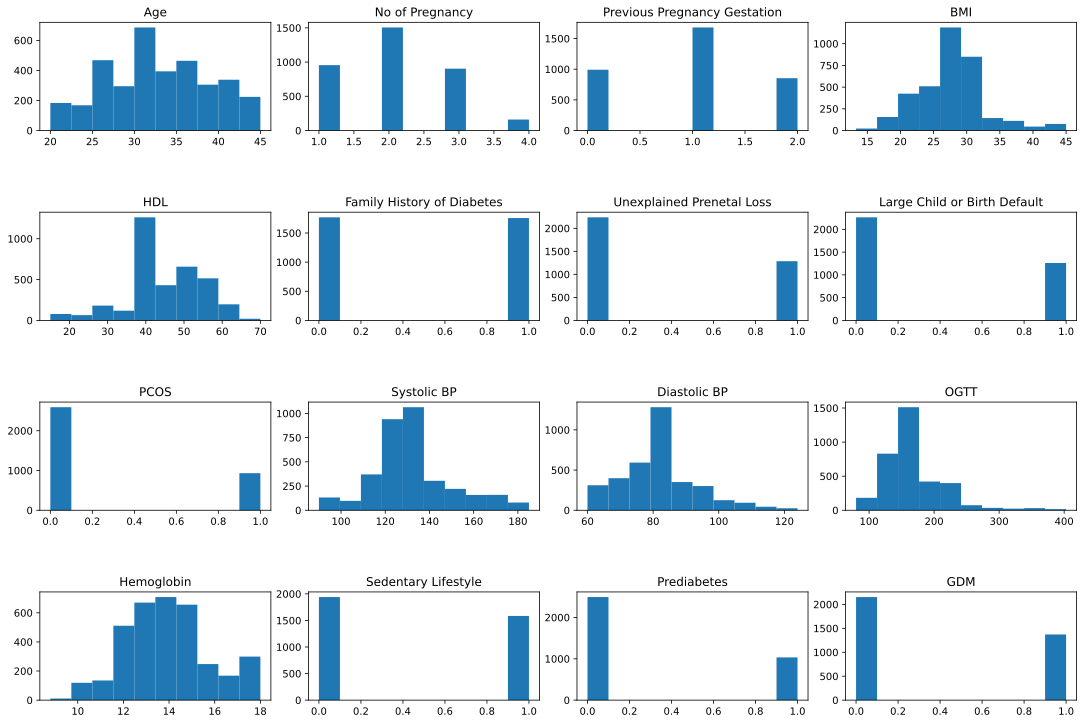

In [39]:
# checking the distribution of the variables.

# Setting the plots layout
plt.subplots(4, 4, figsize=(15, 10))

# Plotting
for i, column in enumerate(gdm.columns, 1):
    plt.subplot(4, 4, i)
    plt.hist(gdm[column])
    plt.title(column)
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

None of the variables are really normally distributed. We would scale our data to ensure the features are all on the same scale when we build our models.


#### 3.2. Relationship between predictor variables and the target variable<a class="anchor" id="#EDA-bullet2"></a>

In [40]:
# Separating the data into X and y variables
# X contains the independent variables.
# y is the target.  The dependent variable.
X = gdm.drop(columns='GDM')
y = gdm['GDM']

In [41]:
# Checking the shape of X and y variables
print(f'Original gdm data set had {gdm.shape[0]} rows and {gdm.shape[1]} columns.')
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns.')
print(f'y has {y.shape[0]} rows and 1 column.')

Original gdm data set had 3525 rows and 16 columns.
X has 3525 rows and 15 columns.
y has 3525 rows and 1 column.


In [42]:
# checking the relationship between the independent variables and the dependent variable

# Loop over the columns and plot the relationship between each column and the target
plt.subplots(4, 4, figsize=(15, 10))

count = 1

for col in X.columns:
    plt.subplot(4, 4, count)
    plt.scatter(X[col], y)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

The plots above does not show a linear relationship between the predictor variables and GDM. We would expect some of the variables to be positively or negatively related to GDM as they are factors associated with GDM

#### 3.3. Correlation between the target variable and all predictor variables<a class="anchor" id="#EDA-bullet3"></a>

Lets look at the correlation coefficients between GDM and the predictor columns.

Correlation ranges from -1 to 1 with o indicating no correlation, -1 indicating a perfect negative correLation and 1 representing a perfect positive correlation. 

In [43]:
gdm.corr()['GDM'].sort_values(ascending=False)

GDM                             1.000000
Prediabetes                     0.740059
OGTT                            0.697172
PCOS                            0.693538
Diastolic BP                    0.579715
Systolic BP                     0.546998
BMI                             0.536439
Previous Pregnancy Gestation    0.483954
Hemoglobin                      0.480545
Age                             0.446500
Large Child or Birth Default    0.347396
Family History of Diabetes      0.345066
Unexplained Prenetal Loss       0.224166
No of Pregnancy                 0.206292
Sedentary Lifestyle             0.138116
HDL                            -0.649586
Name: GDM, dtype: float64

Prediabetes, OGTT, PCOS, Diastolic BP, Systolic BP and BMI are all somewhat strongly correlated with GDM with prediabetes having the highest correlation at 0.74. We would plot some graphs to show the distribution of variables with an r > 0.40 and GDM. HDL is negatively correlated with GDM. 

#### 3.4. Distribution of  predictor variables with r> 0.4 with the target variable<a class="anchor" id="#EDA-bullet4"></a>

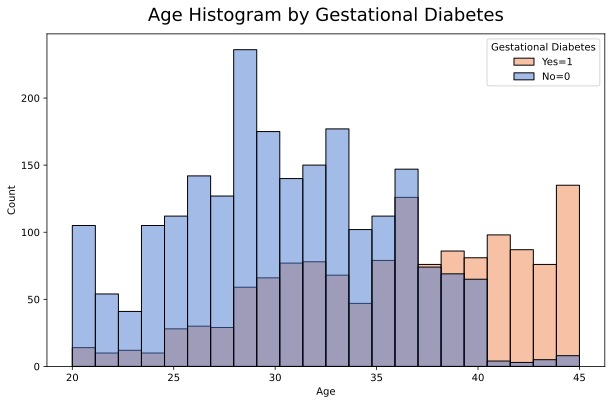

In [44]:
#plotting Age and GDM
plt.figure(figsize=(10,6))
sns.histplot(data=gdm, x='Age', hue='GDM', palette="muted")
plt.title('Age Histogram by Gestational Diabetes', size=18, pad=13)
plt.xlabel('Age', size=10)
plt.ylabel('Count', size=10)
plt.legend(title='Gestational Diabetes', labels=['Yes=1', 'No=0'])
plt.show()

The histogram above shows that pregnant women 25 years and above were diagnosed with GDM, this is consistent with statistics in the real world. Women 45 years and above have the greatest number of GDM diagnosis. This relates to the real world wherein women ages 45 and above are at an increased risk of pregnancy complication.  

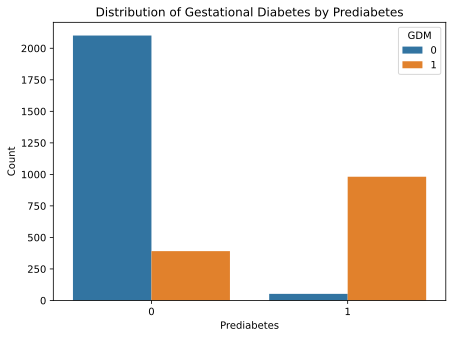

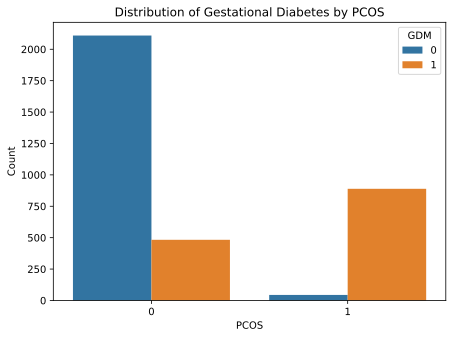

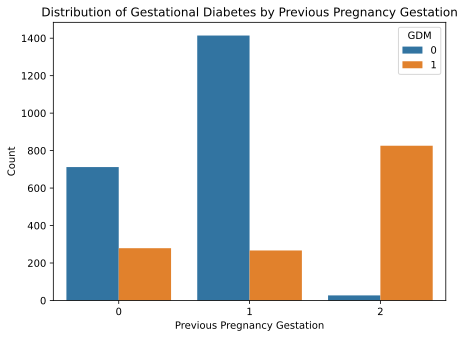

In [45]:
#Iterating through the predictor columns to show the distribution of categorical variables with GDM
#Categorical variables
predictor = gdm[['Prediabetes', 'PCOS', 'Previous Pregnancy Gestation']]

# Loop through the predictor variables
for pred in predictor:
    
    # Create a count plot
    sns.countplot(gdm, x=pred, hue="GDM")
    
    # Add a title and labels to the x and y axes
    plt.title("Distribution of Gestational Diabetes by {}".format(pred))
    plt.ylabel("Count")
    plt.tight_layout()
        
    # Show the plot
    plt.show()

From the graphs above, Prediabetes and PCOS remain risk factors for GDM, women with these conditions are mostly diagnosed with GDM compared with women without them. While GDM diagnosis is not really different between not having a previous pregnancy and having 1 pregnancy, having 2 previous pregnancies is related to having GDM.

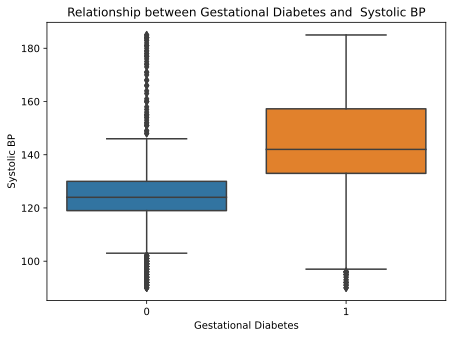

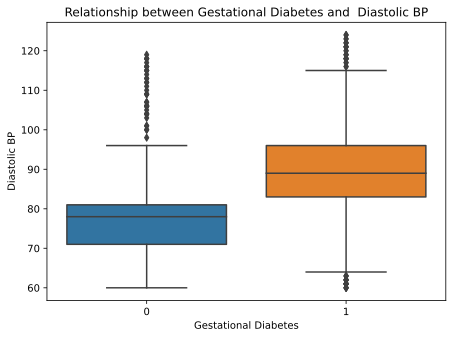

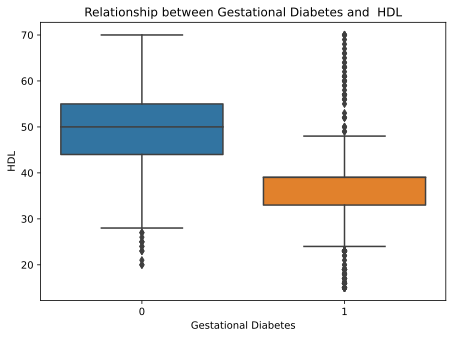

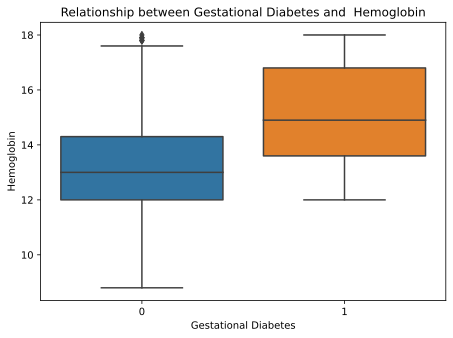

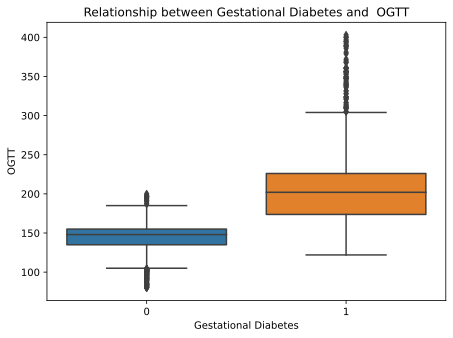

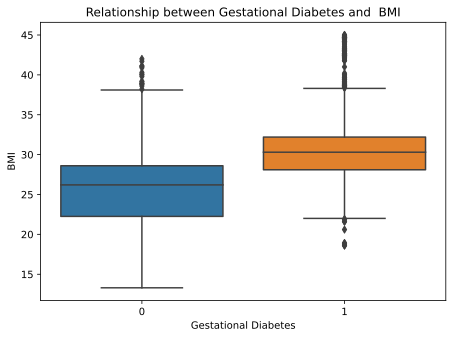

In [46]:
#Iterating through the predictor columns with an r > 0.4 to show their distribution with GDM

#Numeric variables
predictor_num = gdm[['Systolic BP', 'Diastolic BP', 'HDL', 'Hemoglobin','OGTT', 'BMI' ]]

# Loop through the predictor variables
for pred_num in predictor_num:
    
    # Create a count plot
    sns.boxplot(gdm, x="GDM", y=pred_num)
    
    # Add a title and labels to the x and y axes
    plt.title("Relationship between Gestational Diabetes and  {}".format(pred_num))
    plt.xlabel("Gestational Diabetes")
    plt.tight_layout()
        
    # Show the plot
    plt.show()

The boxplots show that women with a high Systolic BP, Diastolic BP, Hemoglobin, OGTT and BMI are more liley to have GDM. Women with a low HDL are more liley to have GDM. Being high or low is based on the threshold for each variable.

#### 3.5. Correlation between all variables to check for multicollinearity<a class="anchor" id="#EDA-bullet5"></a>

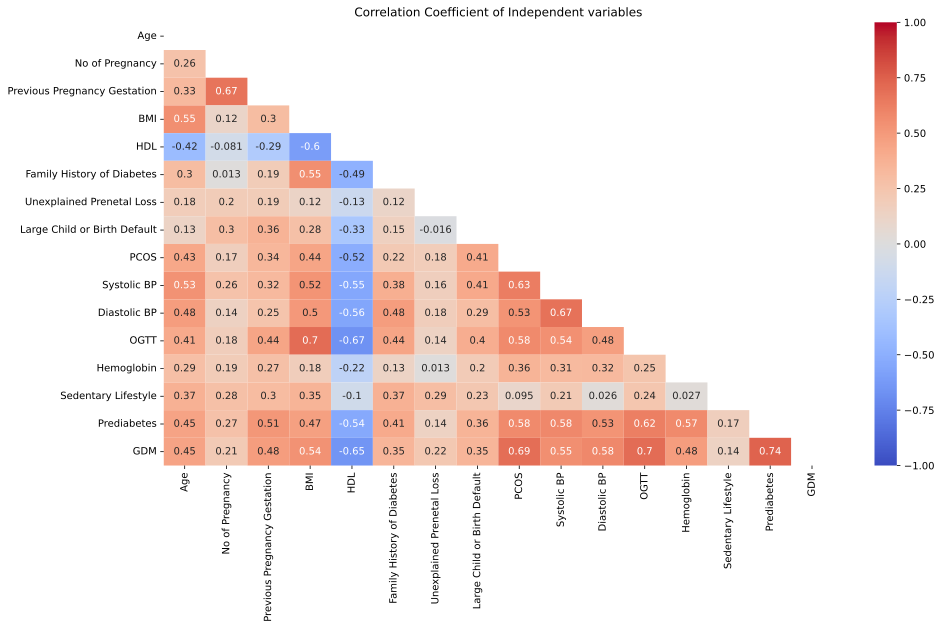

In [47]:
# Correlation of the variables using a heatmap
plt.figure(figsize=(15, 8))
matrix = np.triu(gdm.corr())
sns.heatmap(gdm.corr(), annot=True, cmap='coolwarm', mask=matrix, vmin=-1,vmax = 1)
plt.title('Correlation Coefficient of Independent variables')
plt.show()

The heatmap shows that prediabetes and diastolic BP are correlated at 0.53, prediabetes and previous pregnancy gestation are also correlated at 0.51. BMI and family history of diabetes are correlated at 0.55 and PCOS and diastolic BP are correlated at 0.53. Prediabetes and PCOS are correlated at 0.58, prediabetes is also  correlated with hemoglobin at 0.57, no of pregnancy and previous pregnancy gestation are correlated at 0.67. These correlations are actually expected as these variables are predictors of each other. With the knowledge of this correlations above 0.5, we would go ahead to build our first model and prepare to drop some of these variables. To check for multicollinearity, our focus would be on corrrelation coefficients above 0.5. 

Lets build our baseline logistic regression model

## 4. Baseline Logistic Regression model<a class="anchor" id="#Baselinemodel-bullet"></a>

In [48]:
# splitting the data into remainder and test sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=1)

In [49]:
# splitting the data into train and validation sets

X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size = 0.2,
                     random_state=1)

In [50]:
# Print info on how the data has been split
print(f'The remainder set has {len(X_remainder)} data points.')
print(f'The validation set is: {len(X_validation)} data points')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 2820 data points.
The validation set is: 564 data points
The test set has 705 data points.


In [51]:
#checking the shape of the 3 sets

print(f'The shape of the test set is: {X_test.shape}')
print(f'The of the validation set is: {X_validation.shape}')
print(f'The shape of the train set: {X_train.shape}')

The shape of the test set is: (705, 15)
The of the validation set is: (564, 15)
The shape of the train set: (2256, 15)


In [52]:
# Scaling
#Initiate the scaler
ss = StandardScaler()

#fit the scaler
ss.fit(X_train)

# transform both the train and test sata with the fitted scalar
X_train_ss = ss.transform(X_train)
X_validation_ss = ss.transform(X_validation)
X_test_ss = ss.transform(X_test)

In [53]:
# Baseline model
# Instantiate
my_logit = LogisticRegression() 

#Fit
my_logit.fit(X_train_ss, y_train)

#Score
train_acc = my_logit.score(X_train_ss, y_train)
validation_acc = my_logit.score(X_validation_ss, y_validation)
test_acc = my_logit.score(X_test_ss, y_test)
print(f"The train accuracy is: {round(train_acc, 2)}")
print(f"The validation accuracy is: {round(validation_acc, 2)}")
print(f"The test accuracy is: {round(test_acc, 2)}")

The train accuracy is: 0.97
The validation accuracy is: 0.97
The test accuracy is: 0.96


The train and test accuracies are quite high, the model is not overfitting.

#### 4.1. Model evaluation<a class="anchor" id="#Baselinemodel-bullet1"></a>

In [54]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred = my_logit.predict(X_test_ss)

# confusion matrix
conmax = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmax)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.1f}%')

0    431
1    274
Name: GDM, dtype: int64

predicted 0  predicted 1
true 0          414           17
true 1            8          266

Recall score: 97.1%
Precision score: 94.0%
F1 score: 95.5%


In [55]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       431
           1       0.94      0.97      0.96       274

    accuracy                           0.96       705
   macro avg       0.96      0.97      0.96       705
weighted avg       0.97      0.96      0.96       705



This model performs well with high accuracy(96%), precision(94%), F1(96%) and recall scores((97%). The recall score is 1% higher than the precision score indicating that all cases of GDM are very likely to be predicted. A higher recall score is actually better as we dont want to be missing GDM diagnosis.

## 5. Feature Engineering<a class="anchor" id="##FeatureEngineering-bullet"></a>

It would be interesting to see the relationship between blood pressure and GDM and weight category and GDM. To examine these relationships, I create two columns Blood Pressure Category and Weight_Category.
We would group the BMI values into the standard weight status and the systolic and diastolic BPs into blood pressure categories and then dummify both columns. 
When BMI is below 18.5 the weight status is Underweight, 18.5 - 24.9(Healthy/Normal weight), 25.0-29.9(Overweight), 30 and above(Obesity). 

In [56]:
#lets make a copy of gdm
gdm1 = gdm.copy()
gdm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3525 entries, 1 to 3525
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           3525 non-null   int64  
 1   No of Pregnancy               3525 non-null   int64  
 2   Previous Pregnancy Gestation  3525 non-null   int64  
 3   BMI                           3525 non-null   float64
 4   HDL                           3525 non-null   float64
 5   Family History of Diabetes    3525 non-null   int64  
 6   Unexplained Prenetal Loss     3525 non-null   int64  
 7   Large Child or Birth Default  3525 non-null   int64  
 8   PCOS                          3525 non-null   int64  
 9   Systolic BP                   3525 non-null   float64
 10  Diastolic BP                  3525 non-null   int64  
 11  OGTT                          3525 non-null   float64
 12  Hemoglobin                    3525 non-null   float64
 13  Sed

In [57]:
#Defining blood pressure ranges and adding to the dataframe
def blood_pressure_category(row):
    if row['Systolic BP'] < 120 and row['Diastolic BP'] < 80:
        return 'Normal'
    elif (row['Systolic BP'] >= 120 and row['Systolic BP'] <= 129) and row['Diastolic BP'] < 80:
        return 'Elevated'
    elif (row['Systolic BP'] >= 130 and row['Systolic BP'] <= 139) or (row['Diastolic BP'] >= 80 and row['Diastolic BP'] <= 89):
        return 'Hypertension stage 1'
    elif row['Systolic BP'] >= 140 or row['Diastolic BP'] >= 90:
        return 'Hypertension stage 2'
    elif row['Systolic BP'] > 180 or row['Diastolic BP'] > 120:
        return 'Hypertensive crisis'

gdm1['Blood_Pressure'] = gdm.apply(blood_pressure_category, axis=1)

In [58]:
#Defining weight categories and adding to the dataframe
def weight_category(row):
    if row['BMI'] < 18.5:
        return 'Underweight'
    elif row['BMI'] >= 18.5 and row['BMI'] <= 24.9:
        return 'Healthy weight'
    elif row['BMI'] >= 25.0 and row['BMI'] <= 29.9:
        return 'Overweight'
    elif row['BMI'] >= 30:
        return 'Obese'

gdm1['Weight_Category'] = gdm.apply(weight_category, axis=1)

In [59]:
#viewing the dataframe to see if the columns have been added
gdm1.head()

Age  No of Pregnancy  Previous Pregnancy Gestation    BMI   HDL  \
Case Number                                                                    
1             22                2                             1  23.30  55.0   
2             26                2                             1  21.30  53.0   
3             29                1                             0  25.25  50.0   
4             28                2                             1  26.30  51.0   
5             21                2                             1  22.25  52.0   

             Family History of Diabetes  Unexplained Prenetal Loss  \
Case Number                                                          
1                                     0                          0   
2                                     0                          0   
3                                     0                          0   
4                                     0                          0   
5                                     0                          0   

             Large Child or Birth Default  PCOS  Systolic BP  Diastolic BP  \
Case Number                                                                  
1                                       0     0        102.0            69   
2                                       0     0        101.0            63   
3                                       0     0        118.0            79   
4                                       0     0         99.0            70   
5                                       0     0        116.0            65   

              OGTT  Hemoglobin  Sedentary Lifestyle  Prediabetes  GDM  \
Case Number                                                             
1            139.0        12.0                    0            0    0   
2            142.0        12.4                    0            0    0   
3            144.0        14.3                    0            0    0   
4            150.5        15.0                    0            0    0   
5            138.0        15.0                    0            0    0   

            Blood_Pressure Weight_Category  
Case Number                                 
1                   Normal  Healthy weight  
2                   Normal  Healthy weight  
3                   Normal      Overweight  
4                   Normal      Overweight  
5                   Normal  Healthy weight

The data frame shows the two new columns

In [60]:
# viewing the datatypes
gdm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3525 entries, 1 to 3525
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           3525 non-null   int64  
 1   No of Pregnancy               3525 non-null   int64  
 2   Previous Pregnancy Gestation  3525 non-null   int64  
 3   BMI                           3525 non-null   float64
 4   HDL                           3525 non-null   float64
 5   Family History of Diabetes    3525 non-null   int64  
 6   Unexplained Prenetal Loss     3525 non-null   int64  
 7   Large Child or Birth Default  3525 non-null   int64  
 8   PCOS                          3525 non-null   int64  
 9   Systolic BP                   3525 non-null   float64
 10  Diastolic BP                  3525 non-null   int64  
 11  OGTT                          3525 non-null   float64
 12  Hemoglobin                    3525 non-null   float64
 13  Sed

#### 5.1. Dummify the new columns and rename<a class="anchor" id="##FeatureEngineering-bullet1"></a>

We would dummify the two columns to be able to analyze them. Dummifying means changing them to numeric columns

In [61]:
#We would first dummify weight_category and blood pressure
# List of column names to dummy
columns_to_dummy = ['Weight_Category', 'Blood_Pressure']

# Loop through the list of columns and create dummies for each column
for column in columns_to_dummy:
    dummies = pd.get_dummies(gdm1[column], prefix=column)
    gdm1= pd.concat([gdm1, dummies], axis=1)
    gdm1.drop(column, axis=1, inplace=True)

In [62]:
#viewing the data frame again
gdm1.head()

Age  No of Pregnancy  Previous Pregnancy Gestation    BMI   HDL  \
Case Number                                                                    
1             22                2                             1  23.30  55.0   
2             26                2                             1  21.30  53.0   
3             29                1                             0  25.25  50.0   
4             28                2                             1  26.30  51.0   
5             21                2                             1  22.25  52.0   

             Family History of Diabetes  Unexplained Prenetal Loss  \
Case Number                                                          
1                                     0                          0   
2                                     0                          0   
3                                     0                          0   
4                                     0                          0   
5                                     0                          0   

             Large Child or Birth Default  PCOS  Systolic BP  ...  \
Case Number                                                   ...   
1                                       0     0        102.0  ...   
2                                       0     0        101.0  ...   
3                                       0     0        118.0  ...   
4                                       0     0         99.0  ...   
5                                       0     0        116.0  ...   

             Prediabetes  GDM  Weight_Category_Healthy weight  \
Case Number                                                     
1                      0    0                               1   
2                      0    0                               1   
3                      0    0                               0   
4                      0    0                               0   
5                      0    0                               1   

             Weight_Category_Obese  Weight_Category_Overweight  \
Case Number                                                      
1                                0                           0   
2                                0                           0   
3                                0                           1   
4                                0                           1   
5                                0                           0   

             Weight_Category_Underweight  Blood_Pressure_Elevated  \
Case Number                                                         
1                                      0                        0   
2                                      0                        0   
3                                      0                        0   
4                                      0                        0   
5                                      0                        0   

             Blood_Pressure_Hypertension stage 1  \
Case Number                                        
1                                              0   
2                                              0   
3                                              0   
4                                              0   
5                                              0   

             Blood_Pressure_Hypertension stage 2  Blood_Pressure_Normal  
Case Number                                                              
1                                              0                      1  
2                                              0                      1  
3                                              0                      1  
4                                              0                      1  
5                                              0                      1  

[5 rows x 24 columns]

In [63]:
# checking the data types
gdm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3525 entries, 1 to 3525
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  3525 non-null   int64  
 1   No of Pregnancy                      3525 non-null   int64  
 2   Previous Pregnancy Gestation         3525 non-null   int64  
 3   BMI                                  3525 non-null   float64
 4   HDL                                  3525 non-null   float64
 5   Family History of Diabetes           3525 non-null   int64  
 6   Unexplained Prenetal Loss            3525 non-null   int64  
 7   Large Child or Birth Default         3525 non-null   int64  
 8   PCOS                                 3525 non-null   int64  
 9   Systolic BP                          3525 non-null   float64
 10  Diastolic BP                         3525 non-null   int64  
 11  OGTT                          

We would convert the dummified columns to integers for easy analysis.

In [64]:
#renaming the weight and blood pressure categories

gdm1.rename(columns={'Weight_Category_Healthy weight': 'Healthy weight', 'Weight_Category_Obese':'Obese', 'Weight_Category_Underweight': 'Underweight',
                   'Weight_Category_Overweight': 'Overweight', 'Blood_Pressure_Elevated': 'Elevated BP', 'Blood_Pressure_Hypertension stage 1': 'Hypertension stage 1',
                   'Blood_Pressure_Hypertension stage 2': 'Hypertension stage 2', 'Blood_Pressure_Normal': 'Normal BP'}, inplace=True)

In [65]:
# vieiwng the data set again to ensure the column names have been changed
gdm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3525 entries, 1 to 3525
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           3525 non-null   int64  
 1   No of Pregnancy               3525 non-null   int64  
 2   Previous Pregnancy Gestation  3525 non-null   int64  
 3   BMI                           3525 non-null   float64
 4   HDL                           3525 non-null   float64
 5   Family History of Diabetes    3525 non-null   int64  
 6   Unexplained Prenetal Loss     3525 non-null   int64  
 7   Large Child or Birth Default  3525 non-null   int64  
 8   PCOS                          3525 non-null   int64  
 9   Systolic BP                   3525 non-null   float64
 10  Diastolic BP                  3525 non-null   int64  
 11  OGTT                          3525 non-null   float64
 12  Hemoglobin                    3525 non-null   float64
 13  Sed

In [66]:
# Converting all datatypes unit8 to integer and Systolic BP
gdm1['Healthy weight'] = gdm1['Healthy weight'].astype('int64')
gdm1['Obese'] = gdm1['Obese'].astype('int64')
gdm1['Overweight'] = gdm1['Overweight'].astype('int64')
gdm1['Underweight'] = gdm1['Underweight'].astype('int64')
gdm1['Elevated BP'] = gdm1['Elevated BP'].astype('int64')
gdm1['Hypertension stage 1'] = gdm1['Hypertension stage 1'].astype('int64')
gdm1['Hypertension stage 2'] = gdm1['Hypertension stage 2'].astype('int64')
gdm1['Normal BP'] = gdm1['Normal BP'].astype('int64')
gdm1['Systolic BP'] = gdm1['Systolic BP'].astype('int64')

In [67]:
#viewing the data types
gdm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3525 entries, 1 to 3525
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           3525 non-null   int64  
 1   No of Pregnancy               3525 non-null   int64  
 2   Previous Pregnancy Gestation  3525 non-null   int64  
 3   BMI                           3525 non-null   float64
 4   HDL                           3525 non-null   float64
 5   Family History of Diabetes    3525 non-null   int64  
 6   Unexplained Prenetal Loss     3525 non-null   int64  
 7   Large Child or Birth Default  3525 non-null   int64  
 8   PCOS                          3525 non-null   int64  
 9   Systolic BP                   3525 non-null   int64  
 10  Diastolic BP                  3525 non-null   int64  
 11  OGTT                          3525 non-null   float64
 12  Hemoglobin                    3525 non-null   float64
 13  Sed

#### 5.2. Examine the relationship between the new columns and the target variable<a class="anchor" id="##FeatureEngineering-bullet2"></a>

Now lets build out logistic regression model to examine the relationship between weight category and GDM

In [68]:
#Defining X(predictors) and y(target)
X = gdm1[['Obese','Underweight', 'Overweight', 'Healthy weight']]
y = gdm1['GDM']

In [69]:
# Splitting the dataset

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [70]:
from sklearn.linear_model import LogisticRegression

#instantiate the model
bmi_logreg = LogisticRegression()

#fit the model
bmi_logreg.fit(X_rem, y_rem)

#score the model and print accuracy
print(f'Accuracy on remainder set: {bmi_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set : {bmi_logreg.score(X_test, y_test)}')

Accuracy on remainder set: 0.7945516458569807
Accuracy on test set : 0.7902494331065759


In [71]:
# Get the coefficients
coefficients = bmi_logreg.coef_[0]

# Zip the coefficients and independent variable names together
coefficient_tuples = list(zip(X, coefficients))

# Sort the coefficients by absolute value, in descending order
coefficient_tuples = sorted(coefficient_tuples, key=lambda x: abs(x[1]), reverse=True)

# Print the coefficients
for variable_name, coefficient in coefficient_tuples:
    print(f"The coefficient of {variable_name}: {coefficient:.3f}")

The coefficient of Obese: 3.066
The coefficient of Healthy weight: -2.026
The coefficient of Underweight: -1.594
The coefficient of Overweight: 0.558


The coefficients above shows that being classified as obese or overweight is positively associated with GDM while being classified as healthy or underweight is negatively associated with GDM. Obese has the highest coefficient with a unit increase in Obese leading to an increase in the log odds of GDM by 3.066; an obesed pregnant woman is 3 times more likley to be diagnosed with GDM than other weight categories. This means that an obesed or overweight pregnant woman has an increase likelihood of being diagnosed with GDM. This result is actually true in the real world where overweigth and obesity are risk factors for gestational diabetes.

Now lets build out logistic regression model to examine the relationship between blood pressure category and GDM

In [72]:
#Defining X(predictors) and y(target)
X = gdm1[['Elevated BP','Hypertension stage 1', 'Hypertension stage 2', 'Normal BP']]
y = gdm1['GDM']

In [73]:
# Splitting the dataset

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [74]:
#building the model

#instantiate the model
bp_logreg = LogisticRegression()

#fit the model
bp_logreg.fit(X_rem, y_rem)

#score the model and print accuracy
print(f'Accuracy on remainder set: {bp_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set : {bp_logreg.score(X_test, y_test)}')

Accuracy on remainder set: 0.7710934544078698
Accuracy on test set : 0.7834467120181405


In [75]:
# Get the coefficients
coefficients = bp_logreg.coef_[0]

# Zip the coefficients and independent variable names together
coefficient_tuples = list(zip(X, coefficients))

# Sort the coefficients by absolute value, in descending order
coefficient_tuples = sorted(coefficient_tuples, key=lambda x: abs(x[1]), reverse=True)

# Print the coefficients
for variable_name, coefficient in coefficient_tuples:
    print(f"The coefficient of {variable_name}: {coefficient:.3f}")

The coefficient of Normal BP: -3.568
The coefficient of Hypertension stage 2: 3.402
The coefficient of Hypertension stage 1: 0.795
The coefficient of Elevated BP: -0.628


The coefficients above shows that having a normal or elevated BP is negatively associated with GDM 
while hypertension stage 2 and 1 are positively associated with GDM. Hypertension stage 2 has the highest coefficient
with a unit increase leading to an increase in the log odds of GDM by 3.402; a pregnant woman with Hypertension stage 2 is 3 times more likley to be diagnosed with GDM than other blood pressure categories. This means pregnant woman with hypertension stage 2 has an increase likelihood of being diagnosed with GDM. This result also correlates with the real world where high blood pressure(hypertension) is a risk factor for gestational diabetes.

## 6. Models after feature engineering<a class="anchor" id="#Models-bullet"></a>

Building a logistic regression model after feature engineering

In [76]:
# Define X (i.e., independent variables; features) and y (i.e., dependent variable; target)
X = gdm1.drop('GDM', axis=1)
y = gdm1['GDM']

In [77]:
# splitting the data into remainder and test sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=1)

In [78]:
# splitting the data into train and validation sets
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.2,
                     random_state=1)

In [79]:
#checking the shape of the 3 sets
print(f'The shape of the test set is: {X_remainder.shape}')
print(f'The shape of the test set is: {X_test.shape}')
print(f'The of the validation set is: {X_validation.shape}')
print(f'The shape of the train set: {X_train.shape}')

The shape of the test set is: (2820, 23)
The shape of the test set is: (705, 23)
The of the validation set is: (564, 23)
The shape of the train set: (2256, 23)


In [80]:
# Putting X_train into a dataframe after splitting
X_train = pd.DataFrame(X_train, columns=X.columns)

In [81]:
# viewing X_trained
X_train.head()

Age  No of Pregnancy  Previous Pregnancy Gestation    BMI  \
Case Number                                                              
3518          37                2                             0  32.00   
551           33                2                             1  27.35   
2454          25                4                             2  31.90   
1451          28                2                             1  24.40   
3176          40                2                             2  38.50   

                   HDL  Family History of Diabetes  Unexplained Prenetal Loss  \
Case Number                                                                     
3518         31.000000                           0                          0   
551          40.000000                           1                          1   
2454         39.031735                           1                          1   
1451         60.000000                           0                          0   
3176         24.000000                           1                          0   

             Large Child or Birth Default  PCOS  Systolic BP  ...  \
Case Number                                                   ...   
3518                                    0     1          167  ...   
551                                     0     0          123  ...   
2454                                    1     1          173  ...   
1451                                    1     0          127  ...   
3176                                    1     1          170  ...   

             Sedentary Lifestyle  Prediabetes  Healthy weight  Obese  \
Case Number                                                            
3518                           0            1               0      1   
551                            1            0               0      0   
2454                           1            1               0      1   
1451                           0            0               1      0   
3176                           0            1               0      1   

             Overweight  Underweight  Elevated BP  Hypertension stage 1  \
Case Number                                                               
3518                  0            0            0                     0   
551                   1            0            0                     1   
2454                  0            0            0                     1   
1451                  0            0            1                     0   
3176                  0            0            0                     0   

             Hypertension stage 2  Normal BP  
Case Number                                   
3518                            1          0  
551                             0          0  
2454                            0          0  
1451                            0          0  
3176                            1          0  

[5 rows x 23 columns]

In [82]:
# Putting X_remainder into a dataframe after splitting
X_remainder = pd.DataFrame(X_remainder, columns=X.columns)

In [ ]:
#viewing X_remainder
X_remainder.head()

#### 6.1. Logistic Regression Classifier<a class="anchor" id="#Models-bullet1"></a>

In [ ]:
# scaling our data 
#Initiate the scaler
scaler = StandardScaler()

#fit the scaler
scaler.fit(X_train)

# transform both the train and test sata with the fitted scalar
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Instantiate
my_logreg = LogisticRegression() 

#Fit
my_logreg.fit(X_train_scaled, y_train)

#Score
train_accuracy = my_logreg.score(X_train_scaled, y_train)
validation_accuracy = my_logreg.score(X_validation_scaled, y_validation)
test_accuracy = my_logreg.score(X_test_scaled, y_test)
print(f"The train accuracy is: {round(train_accuracy, 4)}")
print(f"The validation accuracy is: {round(validation_accuracy, 4)}")
print(f"The test accuracy is: {round(test_accuracy, 4)}")

The train and test accuracy are close at 97% and 96% respectively and the same with the baseline model. There is no overfitting and our model is performing well

#### 6.1.1. Model Evaluation<a class="anchor" id="#Models-bullet11"></a>

In [ ]:
# class distribution
display(y_test.value_counts())

# predict classification
y_pred_log = my_logreg.predict(X_test_scaled)

# confusion matrix
conmax = pd.DataFrame(
    data = confusion_matrix(y_test, y_pred_log),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmax)

print(f'Recall score: {recall_score(y_test, y_pred_log)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_pred_log)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_pred_log)*100:0.1f}%')

In [ ]:
# the function expects the estimator, inputs and target as parameters
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(my_logreg, X_test_scaled, y_test, cmap = 'viridis');

In [ ]:
# classification report
print(classification_report(y_test,y_pred_log))

This model performs well with high accuracy(97%), precision(95%), F1(96%) and recall scores((97%). The recall score is 1% higher than the precision score indicating that all cases of GDM are very likely to be predicted. A higher recall score is actually better as we dont want to be missing GDM diagnosis.

In [ ]:
# Probabilistic prediction
y_test_prob = my_logreg.predict_proba(X_test_scaled)[:,1]

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_prob)

# AUC
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc="best")
plt.show()

With an AUC of 0.99, our model is pretty confident that GDM is correctly being diagnosed as GDM than non GDM being diagnosed as GDM.

#### 6.1.2. Model Hyperparameter Optimization<a class="anchor" id="#Models-bullet12"></a>

Hyper parameter optimization for Logistic Regression to find the best model.

In [90]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Create placeholders for all three steps
estimators_logit = [
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA()),
    ('model', LogisticRegression())
]

my_pipe_logit = Pipeline(estimators_logit, memory=cachedir)

param_grid_logit = [

    {
        'scaler': [StandardScaler(), None],
        'dim_reducer': [PCA(), KernelPCA()],
        'model': [LogisticRegression()],
        'model__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
        'model__penalty': ['l1', 'l2', 'elasticnet','none'],
        'model__solver':['lbfgs', 'liblinear', 'saga', 'sag'],
        'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
    }

]
grid_logit= GridSearchCV(my_pipe_logit, param_grid_logit, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

model_grid_logit = grid_logit.fit(X_remainder,y_remainder)

In [91]:
#best parameters
model_grid_logit.best_params_

{'dim_reducer': PCA(n_components=0.95),
 'dim_reducer__n_components': 0.95,
 'model': LogisticRegression(C=0.1, penalty='l1', solver='liblinear'),
 'model__C': 0.1,
 'model__penalty': 'l1',
 'model__solver': 'liblinear',
 'scaler': StandardScaler()}

In [92]:
# Best estimator object
model_grid_logit.best_estimator_

Pipeline(memory='C:\\Users\\Adetola\\AppData\\Local\\Temp\\tmp_ctlhcpx',
         steps=[('scaler', StandardScaler()),
                ('dim_reducer', PCA(n_components=0.95)),
                ('model',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [93]:
# Print the accuracies
print(f"The best model's accuracy on the remainder set: {model_grid_logit.score(X_remainder, y_remainder)}")
print(f"The best model's accuracy on the test set: {model_grid_logit.score(X_test, y_test)}")

The best model's accuracy on the remainder set: 0.9730496453900709
The best model's accuracy on the test set: 0.9602836879432625


The test and remainder accuracies for the best Logistic model are the same at 97%. 

#### 6.2. K Nearest Neighbor Classifier<a class="anchor" id="#Models-bullet1"></a>

Building a K Nearest Neigbor( KNN) model

In [94]:
# Initialize the classification model
KNN_model = KNeighborsClassifier()

#Fit
KNN_model.fit(X_train_scaled, y_train)

#Score and print
print("Train accuracy:", KNN_model.score(X_train_scaled, y_train))
print("Validation accuracy:", KNN_model.score(X_train_scaled, y_train))
print("Test accuracy:", KNN_model.score(X_test_scaled, y_test))

Train accuracy: 0.9827127659574468
Validation accuracy: 0.9827127659574468
Test accuracy: 0.9588652482269504


#### 6.2.1. Model Evaluation<a class="anchor" id="#Models-bullet21"></a>

In [95]:
# class distribution
display(y_test.value_counts())

# predict classification
y_pred_knn = KNN_model.predict(X_test_scaled)

# confusion matrix
conmax = pd.DataFrame(
    data = confusion_matrix(y_test, y_pred_knn),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmax)

print(f'Recall score: {recall_score(y_test, y_pred_knn)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_pred_knn)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_pred_knn)*100:0.1f}%')

0    431
1    274
Name: GDM, dtype: int64

predicted 0  predicted 1
true 0          411           20
true 1            9          265

Recall score: 96.7%
Precision score: 93.0%
F1 score: 94.8%


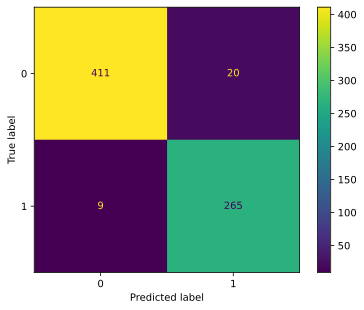

In [96]:
# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(KNN_model, X_test_scaled, y_test, cmap = 'viridis');

In [ ]:
#classification report
print(classification_report(y_test,y_pred_knn))

This model performs well with high accuracy(96%), precision(93%), F1(95%) and recall scores((97%). The recall score is 3% higher than the precision score indicating that all cases of GDM are very likely to be predicted. We want to have a higher recall score so this is good.

In [ ]:
# Probabilistic prediction
y_test_proba = KNN_model.predict_proba(X_test_scaled)[:,1]

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba)

# AUC
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for KNN Model')
plt.legend(loc="best")
plt.show()

#### 6.2.2. Model Hyperparameter Optimization<a class="anchor" id="#Models-bullet22"></a>

Building and ML pipeline for KNN to find the best KNN model

In [ ]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Create placeholders for all three steps
estimators_knn = [
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA()),
    ('model', KNeighborsClassifier())
]

my_pipe_knn = Pipeline(estimators_knn, memory=cachedir)

param_grid_knn = [

    {
        'scaler': [StandardScaler(), None],
        'dim_reducer': [PCA(), KernelPCA()],
        'model': [KNeighborsClassifier()], 
        'model__n_neighbors': list(range(1,100,2)),
        'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8]
    }

]
grid_knn = GridSearchCV(my_pipe_knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

model_grid_knn = grid_knn.fit(X_remainder,y_remainder)

In [ ]:
# best parameters
model_grid_knn.best_params_

In [ ]:
# Best estimator object
model_grid_knn.best_estimator_

In [ ]:
# Print the accuracies
print(f"The best model's accuracy on the remainder set: {model_grid_knn.score(X_remainder, y_remainder)}")
print(f"The best model's accuracy on the test set: {model_grid_knn.score(X_test, y_test)}")

The test and remainder accuracies for the best KNN model are 97% and 98% respectively. There is no overfitting. These results are very similar to all the models we have built so far

#### 6.3. Random Forest Classifier<a class="anchor" id="#Models-bullet3"></a>

Building a Random Forest model

In [ ]:
# Initialize the classification model
RF_model = RandomForestClassifier()

#Fit
RF_model.fit(X_train, y_train)

#Score and print
print("Train accuracy:", RF_model.score(X_train, y_train))
print("Validation accuracy:", RF_model.score(X_train, y_train))
print("Test accuracy:", RF_model.score(X_test, y_test))

This model has a perfect train accuracy and 96% test accuracy. This model shows some overfitting. 

#### 6.3.1. Model Evaluation<a class="anchor" id="#Models-bullet3"></a>

In [ ]:
# class distribution
display(y_test.value_counts())

# predict classification
y_pred_rf = RF_model.predict(X_test)

# confusion matrix
conmax = pd.DataFrame(
    data = confusion_matrix(y_test, y_pred_rf),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmax)

print(f'Recall score: {recall_score(y_test, y_pred_rf)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_pred_rf)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_pred_rf)*100:0.1f}%')

In [ ]:
ConfusionMatrixDisplay.from_estimator(RF_model, X_test, y_test, cmap = 'viridis');
plt.title('Confusion Matrix for Random Forest Model')

In [ ]:
print(classification_report(y_test,y_pred_rf))

This model performs well with high accuracy(96%), precision(93%), F1(95%) and recall scores((97%). The recall score is 4% higher than the precision score, this is good. 

In [ ]:
# Probabilistic prediction
y_test_proba = RF_model.predict_proba(X_test_scaled)[:,1]

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba)

# AUC
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, label='random guess') # random guess
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc="best")
plt.show()

## 7. Final model selection<a class="anchor" id="#FinalModels-bullet"></a>

Building a Machine learning pipeline for all models, scaler and dimension reduction. We would be building four models and tuning the parameters to find the best performing model out of logistic regression, random forest, KNN, and XGBoost.

#### 7.1. GridSearch CV<a class="anchor" id="#FinalModels-bullet"></a>

In [ ]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Create placeholders for all three steps
estimators = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
]

my_pipe = Pipeline(estimators, memory=cachedir)

param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
        'model': [KNeighborsClassifier()], 
        'model__n_neighbors':list(range(1,101,2)),  
    }, 
    {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
        'model': [LogisticRegression()], 
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'model__penalty': ['l1', 'l2'],
        'model__random_state': [12],
        'model__solver':['lbfgs', 'liblinear', 'saga', 'sag']
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
        'model': [RandomForestClassifier()],
        'model__n_estimators': list(range(100,3001,500)),
        'model__max_features': list(range(1,40)),
        'model__max_depth': list(range(1,40)),
        'model__random_state': [12]
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
        'model': [GradientBoostingClassifier()],
        'model__n_estimators': list(range(100,3001,500)),
        'model__learning_rate' : [0.09, 0.08, 0.06, 0.04, 0.02],
        'model__random_state': [12]
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
        'model': [XGBClassifier()],
        'model__max_depth': list(range(1,40)),
        'model__n_estimators': list(range(100,3001,500)),
        'model__learning_rate' : [0.09, 0.08, 0.06, 0.04, 0.02],
        'model__random_state': [12]  
    }
]

grid = GridSearchCV(my_pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

model_grid = grid.fit(X_remainder,y_remainder)



In [ ]:
#best parameters
model_grid.best_params_

In [ ]:
# Best estimator object
model_grid.best_estimator_

In [ ]:
# Print the accuracies
print(f"The best model's accuracy on the remainder set: {model_grid.score(X_remainder, y_remainder)}")
print(f"The best model's accuracy on the test set: {model_grid.score(X_test, y_test)}")

The best model gives a 97% remainder and 96% test accuracies.

#### 7.2. Best Model: Logistic Regression<a class="anchor" id="#FinalModels-bullet2"></a>

With the best model being logistic regression with solver=saga, c=0.1, penalty=L2 and random_state=12, i would build my final model using the standard scaler.

In [ ]:
#Scaling the remainder and test sets
#Initiate the scaler
log_scaler = StandardScaler()

#fit the scaler
log_scaler.fit(X_remainder)

# transform both the train and test sata with the fitted scalar
X_remainder_log_scaled = log_scaler.transform(X_remainder)
X_test_log_scaled = log_scaler.transform(X_test)

Building and testing the model

In [ ]:
# Instantiate
my_best_log = LogisticRegression(C=0.1, solver='saga', penalty='l1', random_state=12) 

#Fit
my_best_log.fit(X_remainder_log_scaled, y_remainder)

#Score
remainder_accuracy = my_best_log.score(X_remainder_log_scaled, y_remainder)
test_accuracy = my_best_log.score(X_test_log_scaled, y_test)
print(f"The train accuracy is: {round(train_accuracy, 2)}")
print(f"The test accuracy is: {round(test_accuracy, 2)}")

The best model gives a 97% train and 96% test accuracies like all other models.

#### 7.2.1. Best Model: Evaluation<a class="anchor" id="#FinalModels-bullet2"></a>

In [ ]:
# Make predictions on the test data
y_pred_best = my_best_log.predict(X_test_log_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, display_labels=['class 0', 'class 1'], cmap='viridis')
plt.title('Confusion Matrix for Best Model(Logistic Regression)')
plt.show()


In [ ]:
print(classification_report(y_test,y_pred_best))

This model performs well with high accuracy(96%), precision(94%), F1(95%) and recall scores((97%). The recall score is 3% higher than the precision score, this is good.

#### 7.3. Acute and Chronic Features<a class="anchor" id="#FinalModels-bullet3"></a>

Finding the acute and chronic features predictive of GDM using the logistic regression coefficients. We would first find the features most predictive of GDM and then separate them into acute or chronic

In [ ]:
#Creating a variable for the coefficients and feature names
coefficient = my_best_log.coef_[0]
features = X_test.columns

#Creating a dataframe for the features and their corresponding coefficients
coef_df  = pd.DataFrame({'features':X_test.columns, 'coefficient': coefficient})

#displaying the coefficients and their corresponding feature
coef_df

Now lets view the top 10 and bottom 10 predictors of Gestational Diabetes based on their coefficients

#### 7.3.1. Top 10 Features<a class="anchor" id="#FinalModels-bullet31"></a>

In [ ]:
#Top 10 predictors - sorting the coefficients in descending order
coef_df.sort_values(by='coefficient', ascending=False, inplace=True)
top_10 = coef_df.head(10)
top_10

In [ ]:
#plotting the top 10 predictors
plt.figure(figsize=(8,6))
plt.bar(x=top_10.features, height=top_10.coefficient,color='blue')
plt.title('Top 10 predictors of Gestational Diabetes')
plt.ylabel('Coefficients', size=10)
plt.xlabel('Features', size =10)
plt.xticks(rotation=45, ha='right', visible=True)
plt.tight_layout()
plt.show()

The graph above shows some expected results of medical and risk factors for gestational diabetes. OGTT is the most predictive feature for GDM. The result of a pregnant woman's OGTT at fasting, 1 or 2 hour(s) after taking a glucose drink would determine if she has GDM or not. If any of the 3 results is above the threshold, she would be diagnosed as having GDM. Diabetes self-management and education support is provided to manage GDM and in some cases, insulin may have to be taken. 
PCOS and Prediabetes as also well known risk factors for GDM. Other features predictive of GDM are
- Hemoglobin
- Unexplained prenatal loss
- Diastolic BP
- Previouspregnancy gestation
- Being obese
- Hypertension stage 2

BMI is not a predictor of GDM, it has 0 coefficient.


Acute conditions develop sudenly and are short term while chronic conditions develop gradually over a prolonged period of time and are long-term. From the graph above, OGTT and unexplained pregnancy loss are the acute features. 

#### 7.3.2. Bottom 10 Features<a class="anchor" id="#FinalModels-bullet32"></a>

In [ ]:
#Bottom 10 predictors - sorting the coefficients in ascending order
coef_df.sort_values(by='coefficient', ascending=True, inplace=True)
bottom_10 = coef_df.head(10)
bottom_10

In [ ]:
#plotting the top 10 predictors
plt.figure(figsize=(8,6))
plt.bar(x=bottom_10.features, height=bottom_10.coefficient,color='red')
plt.title('Bottom 10 predictors of Gestational Diabetes')
plt.ylabel('Coefficients', size=10)
plt.xlabel('Features', size =10)
plt.xticks(rotation=45, ha='right', visible=True)
plt.tight_layout()
plt.ylim(0, -0.7)
plt.show()

The graph above shows that HDL is the least predictive feature of GDM. This is a bit surprising as lipid protein can help predict GDM. It does however show a negative association which is expected. Age and Systolic BP are negatively asscoiated with GDM. This is also surprising as both features are known to have a positive relationship with GDM. Women above 25 years are at a greater risk of developing GDM. Overweight is know to be a risk factor for GDM but this graph shows that it has no relationship with GDM.

## 8. Summary and conclusion<a class="anchor" id="#Summary_bullet"></a> 

The analysis shows that Age, Previous Pregnancy Gestation,  HDL, Unexplained Prenetal Loss, PCOS, Systolic BP, Diastolic BP,
OGTT, Hemoglobin, Sedentary Lifestyle, Prediabetes, Healthy weight, Obese, Underweight, Hypertension stage 2 and Normal BP 
are correlated to gestational diabetes either negatively of positively. These correlations are expected. 
It is however surprising that Number of Pregnancy, BMI, Family History of Diabetes, Large Child or Birth Default, Overweight and  Elevated BP, Hypertension stage 1 are not associated with GDM. The three most predictive features of GDM are OGTT, PCOS and prediabetes with OGTT being the most predictive. The results of OGTT determines if a pregnant woman has GDM or not. 

OGTT and unexplained pregnancy loss are the more acute features. Women with a hgh OGTT result and unexplained pregnancy loss should be promptly educated on self managing GDM and provide all necessary support. Managing or treating GMD involves, monitoring the blood sugar, eating healthy, being active, monitoring the baby and sometimes taking insulin.

The best model was a Logistic Regression model with with solver=saga, c=0.1, penalty=L2 and random_state=12, its accuracy of 96% is however the same with all other models.

Futher steps for this project include building separate models for chronic and acute features in predicting GDM. As deep learning continues to gain more ground, I would like to apply deep machine learning algorithims to predicting GDM and providing early optimal care. The next step is to build a web app using Streamlit to apply the model and provide guidance to pregnant women on seeking immediate care for GDM.

In [ ]:
#Saving the model for building the web app
import pickle
pickle_out = open("my_best_log1.pkl", "wb") 
pickle.dump(my_best_log, pickle_out) 
pickle_out.close()

In [ ]:
#Saving the data set
gdm1.to_csv('gestational_diabetes.csv', index=False)